In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from collections import defaultdict
from tqdm import tqdm
import shutil

In [2]:
def read_label(anno_path):
    with open(anno_path, 'r') as f:
        lb = [x.split() for x in f.read().strip().splitlines() if len(x)]
        lb = np.array(lb, dtype=np.float32)
    return lb

In [3]:
src = Path('/home/alex/nkbtech/hdd1/Datasets/train_dataset_minpromtorg_train_dataset/photo')

info = defaultdict(list)

for part in src.iterdir():
    if not (part / 'labels').exists():
        continue
    for lb_path in tqdm((part / 'labels').iterdir(), desc=part.name):
        lb = read_label(lb_path)
        info['id'].append(lb_path.stem)
        info['part'].append(part.name)
        info['boxes'].append(lb)
        vid_id = lb_path.stem.split('@')[0]
        info['video_id'].append(vid_id)
info = pd.DataFrame(info)

0-plane: 0it [00:00, ?it/s]

0-plane: 61612it [01:34, 648.85it/s]
1-helicopter: 19960it [00:12, 1542.74it/s]


In [30]:
info

,id,part,boxes,video_id,fold
0,14052021_(9)@ds-0817,0-plane,"[[0.0, 0.42344, 0.656255, 0.025, 0.01563]]",14052021_(9),train
1,14052021_(9)@ds-0636-aughor-inv,0-plane,"[[0.0, 0.599995, 0.674805, 0.02813, 0.01367]]",14052021_(9),train
2,14052021_(t19)@ds-1937-aughor,0-plane,"[[0.0, 0.581245, 0.30469, 0.01563, 0.01172]]",14052021_(t19),train
3,14052021_(9)@ds-1170,0-plane,"[[0.0, 0.46016, 0.63184, 0.03594, 0.01758]]",14052021_(9),train
4,14052021_(t18)@ds-0605-inv,0-plane,"[[0.0, 0.575, 0.27832, 0.02188, 0.01758]]",14052021_(t18),train
...,...,...,...,...,...
81567,27042021_¡¿¿» óÑαΓ«½ÑΓ@ds-0436-aughor,1-helicopter,"[[1.0, 0.436715, 0.52832, 0.04219, 0.0332]]",27042021_¡¿¿» óÑαΓ«½ÑΓ,train
81568,27042021_óÑαΓ«½ÑΓ¡¿¿» 12_30@ds-0759-aughor-inv,1-helicopter,"[[1.0, 0.429685, 0.378905, 0.03125, 0.01953]]",27042021_óÑαΓ«½ÑΓ¡¿¿» 12_30,train
81569,27042021_¡¿¿» óÑαΓ«½ÑΓ@ds-0058,1-helicopter,"[[1.0, 0.43984, 0.51172, 0.02656, 0.02734]]",27042021_¡¿¿» óÑαΓ«½ÑΓ,train
81570,27042021_óÑαΓ«½ÑΓ¡¿¿» 12_30@ds-0574-inv,1-helicopter,"[[1.0, 0.767185, 0.3711, 0.03125, 0.02344]]",27042021_óÑαΓ«½ÑΓ¡¿¿» 12_30,train


In [5]:
info[info['part']=='1-helicopter'].video_id.value_counts()

video_id
27042021_¡¿¿» óÑαΓ«½ÑΓ                  5288
27042021_¡¿¿»_óÑαΓ«½ÑΓ »α«ñ«½ªÑ¡¿Ñ      4868
27042021_óÑαΓ«½ÑΓ¡¿¿» 12_30             3760
27042021_¡¿¿»_óÑαΓ«½ÑΓ                  2852
27042021_¡¿¿»_óÑαΓ«½ÑΓ »α«ñ«½ªÑ¡¿Ñ 2    1956
27042021_óÑαΓ«½ÑΓ¡¿¿» 12_35             1236
Name: count, dtype: int64

In [6]:
info[info['part']=='0-plane'].video_id.value_counts()

video_id
14052021_(9)                      8348
14052021_(t36)                    8348
14052021_(t18)                    7180
14052021_(t19)                    5676
14052021_(t20)                    3956
14052021_(t4)                     3900
14052021_(t17)                    3896
14052021_(t21)                    3836
14052021_(t3)                     3476
27042021_¡¿¿» 12_00 ßá¼«½ÑΓ âÇ    3364
14052021_(11)                     2604
14052021_(t14)                    1832
14052021_(10)                     1424
Φ¿α«¬«Ñ »«½Ñ 1 ¬¼                 1348
14052021_(t37)                    1080
14052021_(t16)                     812
14052021_(t15)                     304
æá¼«½ÑΓ êè ¬á¡á½ 1                 228
Name: count, dtype: int64

<Axes: >

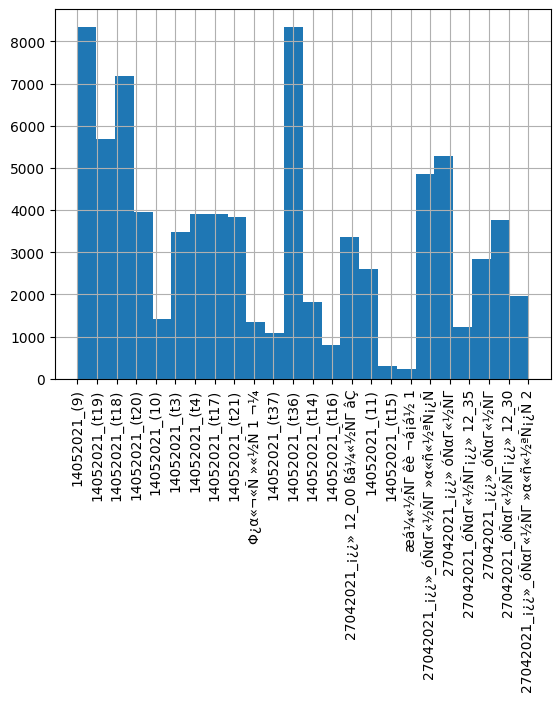

In [29]:
info.video_id.hist(xrot=90, bins=24, label=info.fold)

In [10]:
box_len = np.array([len(i) for i in info.boxes])
info[box_len == 2].to_csv('two_bb.csv', sep='\t')

In [11]:
np.unique(box_len, return_counts=True)

(array([1, 2]), array([81524,    48]))

In [8]:
test = [
    'Φ¿α«¬«Ñ »«½Ñ 1 ¬¼',
    '14052021_(t37)',
    '14052021_(t16)',
    '14052021_(t15)',
    'æá¼«½ÑΓ êè ¬á¡á½ 1',
    '27042021_¡¿¿»_óÑαΓ«½ÑΓ »α«ñ«½ªÑ¡¿Ñ 2',
    '27042021_óÑαΓ«½ÑΓ¡¿¿» 12_35',
]
for i, row in info.iterrows():
    info.loc[i, 'fold'] = 'test' if row['video_id'] in test else 'train'

In [9]:
info.fold.value_counts()

fold
train    74608
test      6964
Name: count, dtype: int64

In [31]:
train_no_aug = []
val_no_aug = []
for i, row in tqdm(info.iterrows()):
    nm = row.id
    # if nm.endswith('-aughor') or nm.endswith('-aughor-inv') or nm.endswith('-inv'):
    #     continue
    if row.fold == 'train':
        train_no_aug.append(str(src / row.part / 'images' / (row.id + '.jpg')) + '\n')
    else:
        val_no_aug.append(str(src / row.part / 'images' / (row.id + '.jpg')) + '\n')

81572it [00:22, 3672.37it/s]


In [32]:
len(train_no_aug), len(val_no_aug)

(74608, 6964)

In [33]:
# with open(src / 'train.txt', 'w') as f:
#     f.writelines(train_no_aug)
with open(src / 'val_aug.txt', 'w') as f:
    f.writelines(val_no_aug)

In [16]:
# Create zip
train_no_aug_imgs = []
val_no_aug_imgs = []
for i, row in tqdm(info.iterrows()):
    nm = row.id
    if nm.endswith('-aughor') or nm.endswith('-aughor-inv') or nm.endswith('-inv'):
        continue
    if row.fold == 'train':
        train_no_aug_imgs.append(src / row.part / 'images' / (row.id + '.jpg'))
    else:
        val_no_aug_imgs.append(src / row.part / 'images' / (row.id + '.jpg'))

81572it [00:03, 20407.15it/s]


In [21]:
(src / 'clean_data' / 'train' / 'images').mkdir(exist_ok=True, parents=True)
(src / 'clean_data' / 'train' / 'labels').mkdir(exist_ok=True, parents=True)
(src / 'clean_data' / 'val' / 'images').mkdir(exist_ok=True, parents=True)
(src / 'clean_data' / 'val' / 'labels').mkdir(exist_ok=True, parents=True)

for img in tqdm(train_no_aug_imgs):
    shutil.copy(img, (src / 'clean_data' / 'train' / 'images' / img.name))
    shutil.copy(img.parent.parent/'labels'/img.with_suffix('.txt').name, (src / 'clean_data' / 'train' / 'labels' / (img.stem+'.txt')))
for img in tqdm(val_no_aug_imgs):
    shutil.copy(img, (src / 'clean_data' / 'val' / 'images' / img.name))
    shutil.copy(img.parent.parent/'labels'/img.with_suffix('.txt').name, (src / 'clean_data' / 'val' / 'labels' / (img.stem+'.txt')))

100%|██████████| 1741/1741 [00:00<00:00, 2736.23it/s]


In [20]:
src

PosixPath('/home/alex/nkbtech/hdd1/Datasets/train_dataset_minpromtorg_train_dataset/photo')

In [24]:
# Generate empty labels

def generate_empty_labels(p):
    p = Path(p)
    if not (p / 'true_labels').exists() and (p/'labels').exists():
        shutil.move(p / 'labels', p / 'true_labels')
    (p / 'labels').mkdir(exist_ok=True, parents=True)
    for img in tqdm((p / 'images').iterdir()):
        with (p / 'labels' / img.with_suffix('.txt').name).open('w') as f:
            pass

In [12]:
generate_empty_labels('/home/alex/nkbtech/hdd1/Datasets/rgb_ir/style1')

3598it [00:00, 13290.47it/s]


In [19]:
generate_empty_labels('/home/alex/nkbtech/hdd4/Datasets/cifrovoy_proryv/birds_ir/valid')

130it [00:00, 11055.10it/s]


In [20]:
generate_empty_labels('/home/alex/nkbtech/hdd4/Datasets/cifrovoy_proryv/birds_drones_ir/train')

1367it [00:00, 13316.49it/s]


In [21]:
generate_empty_labels('/home/alex/nkbtech/hdd4/Datasets/cifrovoy_proryv/birds_valid/valid')

291it [00:00, 14679.69it/s]


In [22]:
generate_empty_labels('/home/alex/nkbtech/hdd4/Datasets/cifrovoy_proryv/infr_brids/train')

154it [00:00, 16919.16it/s]


In [25]:
generate_empty_labels('/home/alex/nkbtech/hdd1/Datasets/train_dataset_minpromtorg_train_dataset/photo/backgrounds')

216it [00:00, 17244.08it/s]


In [27]:
generate_empty_labels('/home/alex/nkbtech/hdd4/Datasets/sod4bird/cutted_images/IR/style1')

2488it [00:00, 9157.07it/s]
